Butterfly code

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import math
import random

plt.style.use('ggplot')

In [5]:
def get_butterflies(strikes, prices):
  butterfly_prices = {}
  for i in range(1,len(strikes)-1):
    # Get components of the butterfly spread
    strike = strikes[i]
    if (strikes[i-1] == strike - 1) and (strikes[i+1] == strike + 1):
      # print((strikes[i-1], strikes[i], strikes[i+1]))
      left = prices[i-1]
      middle = prices[i]
      right = prices[i+1]

      butterfly_price = left + right - (2 * middle)
      butterfly_prices[strike] = butterfly_price

  return butterfly_prices

Example implimentation with real data:

Expiry date is 2025-03-31


Text(0.5, 1.0, 'Butterfly prices for expiry: 2025-03-31')

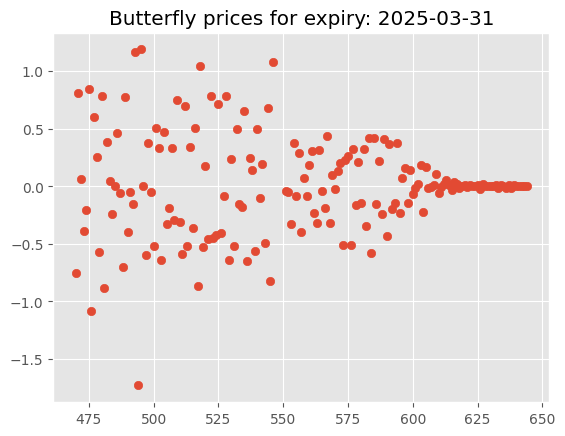

In [6]:
spy = yf.Ticker("SPY")
date = spy.options[10]
print(f"Expiry date is {date}")
options = spy.option_chain(date)
calls = options.calls
puts = options.puts
sorted_calls = calls.sort_values(by="strike", ascending=True).copy()
strikes = sorted_calls['strike']
bid_prices = sorted_calls['bid']
ask_prices = sorted_calls['ask']
mid_prices = (bid_prices + ask_prices) / 2

butterflies = get_butterflies(strikes, mid_prices)

butterflies = pd.DataFrame.from_dict(butterflies, orient='index', columns=["Prices"])
plt.scatter(butterflies.index, butterflies['Prices'])
plt.title(f"Butterfly prices for expiry: {date}")

/var/folders/v3/4n07n0wx3dq1zjxhjbt61wyc0000gn/T/ipykernel_91409/1096310888.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  smoothed_prices.append(sum([normal(strike, mean=center, std=2) * price[0] for strike, price in butterflies.iterrows()]))


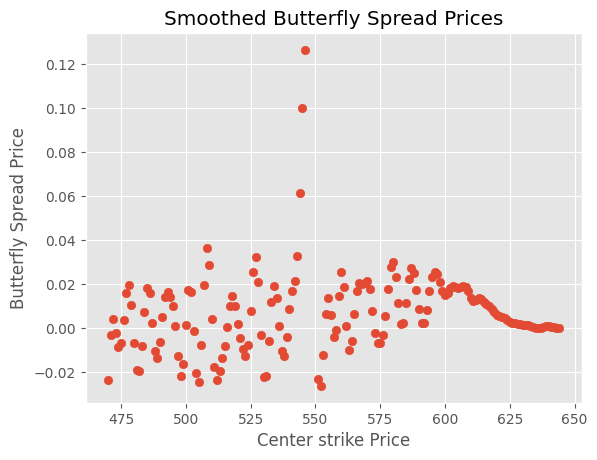

In [7]:
# Let's first get the equation for a Normal distribution at a point x
def normal(x: float, mean=0, std=1):
  return (1 / (std * math.sqrt(2 * math.pi))) * math.exp(-0.5 * (((x-mean)/std)**2))

# Apply the kernel to the prices (we use std = 2 for more smoothing)
smoothed_prices = []
for center in butterflies.index:
  smoothed_prices.append(sum([normal(strike, mean=center, std=2) * price[0] for strike, price in butterflies.iterrows()]))

plt.scatter(butterflies.index, smoothed_prices)
plt.title("Smoothed Butterfly Spread Prices")
plt.xlabel("Center strike Price")
plt.ylabel("Butterfly Spread Price")
plt.show()

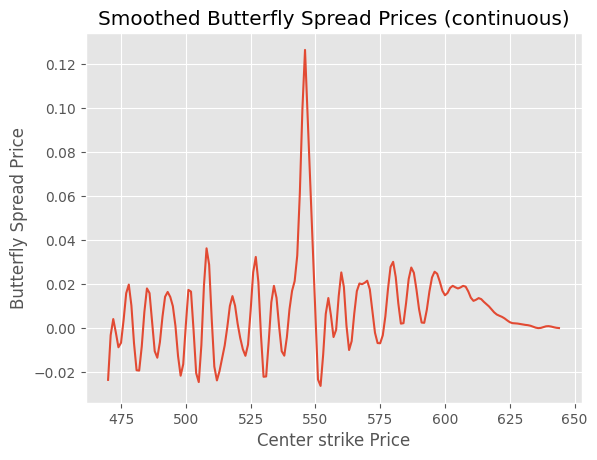

In [8]:
plt.plot(butterflies.index, smoothed_prices)
plt.title("Smoothed Butterfly Spread Prices (continuous)")
plt.xlabel("Center strike Price")
plt.ylabel("Butterfly Spread Price")
plt.show()